In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

These libraries are imported to support data analysis and visualization: pandas and NumPy for data manipulation and numerical operations, Matplotlib for basic plotting, and Seaborn for enhanced statistical visualizations.


In [49]:
df = pd.read_csv(r"C:\Users\FAVOUR\Desktop\StudentPerformance.csv",sep=",")

In [51]:
df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [53]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


df.describe() provides a statistical summary of the dataset, including count, mean, standard deviation, minimum, maximum, and quartiles, helping to quickly understand the distribution and spread of numerical variables.

In [54]:
df.shape

(10000, 6)

In [55]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [56]:
duplicates = df.duplicated().sum()
duplicates

np.int64(127)

In [57]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

This line **removes duplicate rows** from the dataset, keeping only the **first occurrence** of each duplicate to ensure data cleanliness and prevent biased analysis.


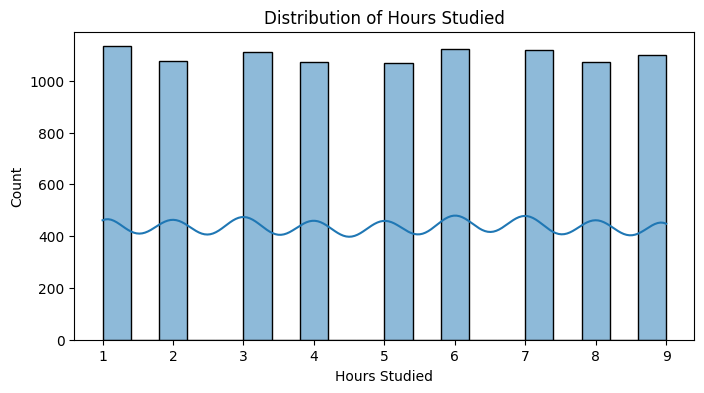

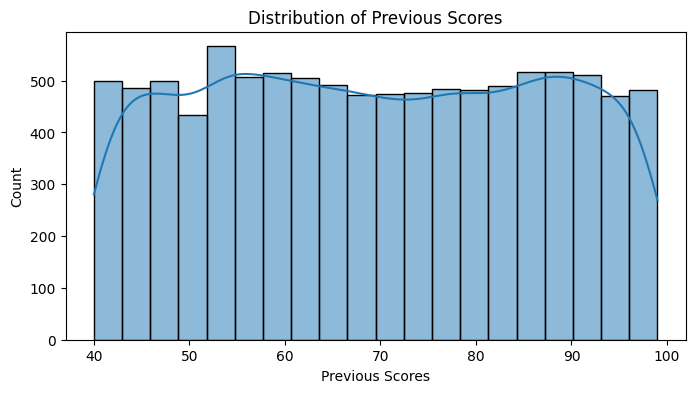

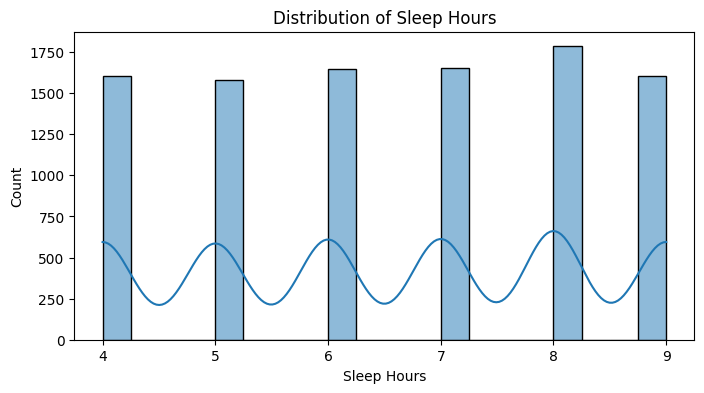

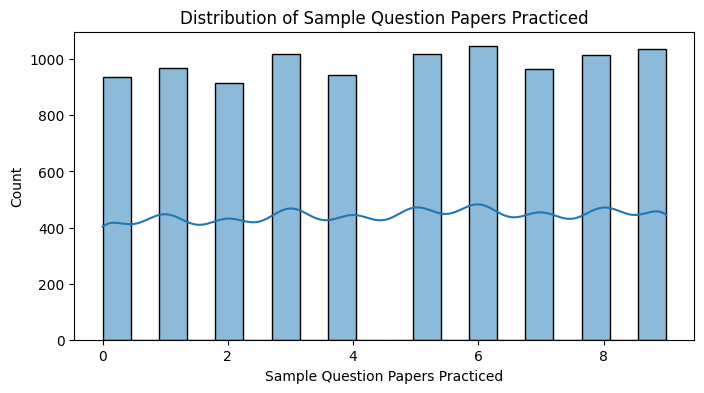

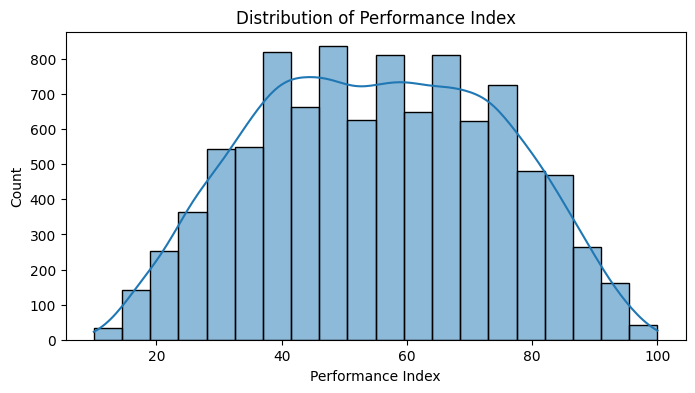

In [58]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=20, kde= True)
    plt.title(f'Distribution of {col}')
    plt.show()

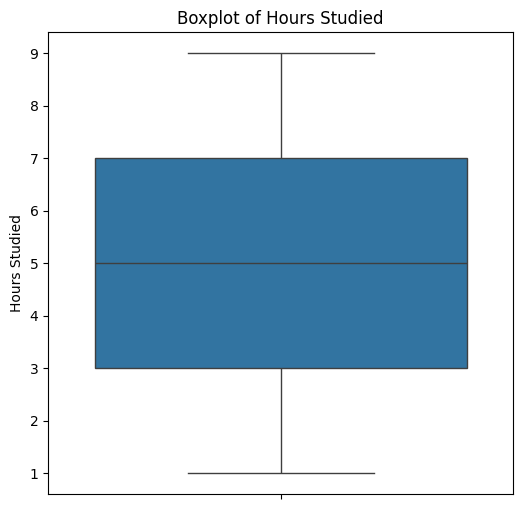

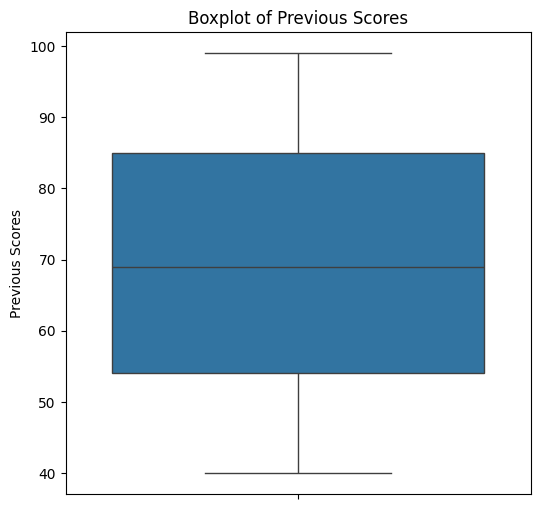

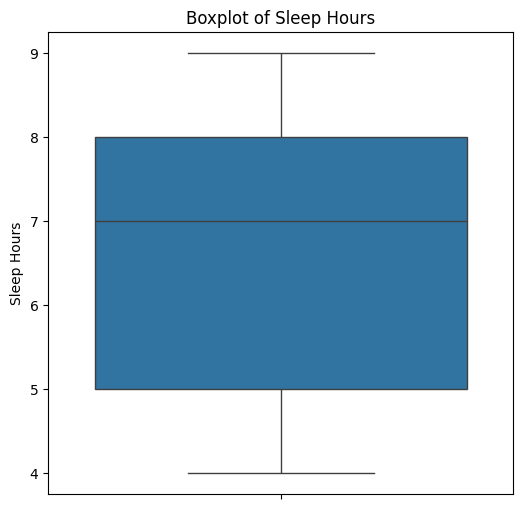

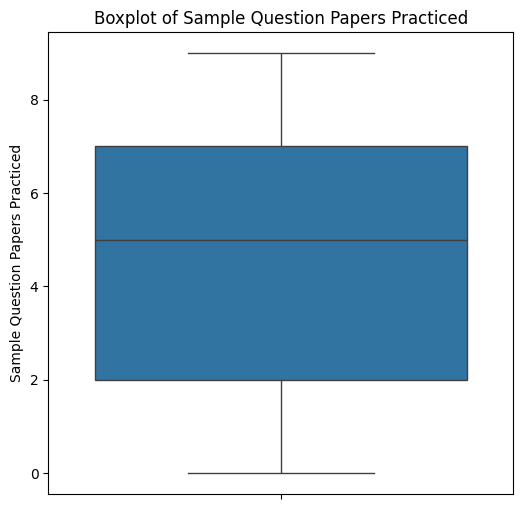

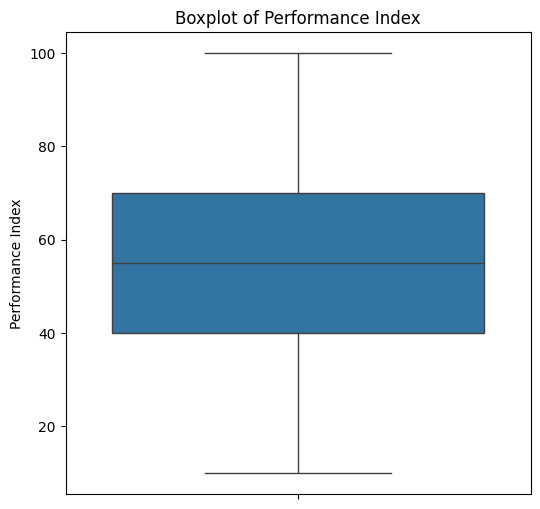

In [59]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [60]:
# Create a copy of the original dataframe
df2 = df.copy()

# Convert Yes / No to 1 / 0
df2['Extracurricular Activities'] = df2['Extracurricular Activities'].map({
    'Yes': 1,
    'No': 0
})

# Check result
df2.info()
df2.head()
df2.shape


<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   int64  
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 539.9 KB


(9873, 6)

In [61]:
df2.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.010676,0.004899,0.002131,0.015740,0.375332
Previous Scores,-0.010676,1.000000,0.009534,0.007975,0.008719,0.915135
Extracurricular Activities,0.004899,0.009534,1.000000,-0.024008,0.013839,0.026075
Sleep Hours,0.002131,0.007975,-0.024008,1.000000,0.004907,0.050352
Sample Question Papers Practiced,0.015740,0.008719,0.013839,0.004907,1.000000,0.043436
Performance Index,0.375332,0.915135,0.026075,0.050352,0.043436,1.000000


The Performance Index is strongly correlated with Previous Scores (r = 0.92), indicating it is the dominant predictor of performance. Hours Studied shows a moderate positive correlation (r = 0.38), suggesting study time also contributes meaningfully. Other variables—Sleep Hours, Sample Question Papers Practiced, and Extracurricular Activities—have very weak correlations with performance, implying a limited linear relationship. Overall, prior academic performance is the strongest driver of current performance.

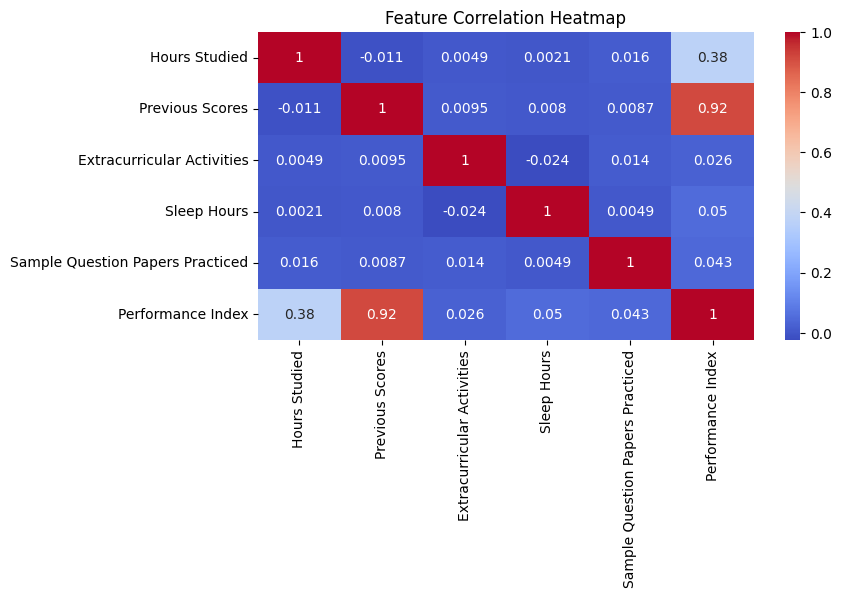

In [62]:

# Correlation heatmap
plt.figure(figsize=(8,4))
sns.heatmap(df2.corr(), cmap='coolwarm', annot=True)
plt.title("Feature Correlation Heatmap")

plt.show()



In [63]:
!pip install statsmodels


In [64]:
df2.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [65]:
import statsmodels.api as sm  #check the significance of the variables with respect to Y
X = df2[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']]
y = df2['Performance Index']
Xc = sm.add_constant(X)
model = sm.OLS(y, Xc).fit()
model.pvalues

const                                0.000000e+00
Hours Studied                        0.000000e+00
Previous Scores                      0.000000e+00
Extracurricular Activities           3.462555e-50
Sleep Hours                          0.000000e+00
Sample Question Papers Practiced    3.721290e-155
dtype: float64

This code fits an Ordinary Least Squares (OLS) regression model with Performance Index as the dependent variable and adds a constant term to estimate the intercept, allowing the p-values to assess the statistical significance of each independent variable with respect to performance.

All variables have p-values far below 0.05, indicating they are statistically significant predictors of the Performance Index. This means the observed relationships are unlikely to be due to random chance, even though some variables show weaker practical (correlation) effects.


For the p-values, we do not consider the constant since it corresponds to the intercept in the linear equation. 
We focus only on the p-values of the explanatory variables.
It is clearly seen that the p-values for all the variables are less than α, so we keep all of 
them

In [66]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.724e+05
Date:                Wed, 17 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:53:51   Log-Likelihood:                -21065.
No. Observations:                9873   AIC:                         4.214e+04
Df Residuals:                    9867   BIC:                         4.219e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = df2[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']]
X = add_constant(X)
# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,Feature,VIF
0,const,38.797757
1,Hours Studied,1.000393
2,Previous Scores,1.000350
3,Extracurricular Activities,1.000888
4,Sleep Hours,1.000676
5,Sample Question Papers Practiced,1.000540


the VIFs are all less than 5,  multi-colinearity is not a problem, we do not consider the constant since it corresponds to the intercept in the linear equation 

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X = df2[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [71]:
# Make predictions
y_pred = model.predict(X_test)
print("R² =", model.score(X, y))

R² = 0.9886767858029223


R² (R-squared) measures the proportion of variance in the dependent variable (y) that can be explained by the independent variables (X).
we computed the R² (coefficient of determination) to evaluate how well the model explains the variance in the data.

In [73]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(scores.mean())   #crossvalidation score

0.9886613898881287


There is no overfitting because R² and cross validation score are both high.

CV in cross-validation score means that the model has been evaluated multiple times on different portions of the data, 
and the score is the average result.

In [74]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE =", rmse)

RMSE = 2.0799471705002452


In [75]:
min = y_test.min()
min

np.float64(10.0)

In [76]:
max = y_test.max()
max

np.float64(100.0)

In [77]:
limit = (max-min)/10
limit

np.float64(9.0)

RMSE(Root Mean Square Error) is less than limit, no error

In [78]:
intercept = model.intercept_
coef_1, coef_2, coef_3, coef_4, coef_5= model.coef_
print(intercept)

-33.96701551454479


In [79]:
print(coef_1, coef_2, coef_3, coef_4, coef_5)

2.849241345157235 1.0182368091747374 0.5568455254314689 0.4700013984102457 0.19339223788470417


In [80]:
equation = f"Y = {intercept} + {coef_1} * X1 + {coef_2}* X2 + {coef_3} * X3 + {coef_4}* X4 + {coef_5} * X5"
equation

'Y = -33.96701551454479 + 2.849241345157235 * X1 + 1.0182368091747374* X2 + 0.5568455254314689 * X3 + 0.4700013984102457* X4 + 0.19339223788470417 * X5'

In [81]:
equation2 = f"Y = {intercept:.2f} + {coef_1:.2f} * X1 + {coef_2:.2f}* X2 + {coef_3:.2f} * X3 + {coef_4:.2f}* X4 + {coef_5:.2f} * X5"
equation2

'Y = -33.97 + 2.85 * X1 + 1.02* X2 + 0.56 * X3 + 0.47* X4 + 0.19 * X5'

In [82]:
def predict_y(X1, X2, X3, X4, X5):
    Y = intercept + (coef_1 * X1) + (coef_2* X2) + (coef_3 * X3) + (coef_4* X4) + (coef_5 * X5) 
    return Y

In [86]:
sample_data = {
    "Hours Studied": [8, 6, 5, 4, 3],#X1 
    "Previous Scores": [90, 80, 75, 65, 55],#X2 
    "Extracurricular Activities": [1, 0, 1, 0, 1],#X3(Yes=1, No=0)
    "Sleep Hours": [8, 7, 7, 6, 6],#X4 
    "Sample Question Papers Practiced": [8, 6, 5, 4, 3],#X5 
}

In [87]:
df3 = pd.DataFrame(sample_data)

In [88]:
df3['Predicted_Performance Index'] = df3.apply(lambda row: predict_y(row['Hours Studied'], row['Previous Scores'], row['Extracurricular Activities'], row['Sleep Hours'],row['Sample Question Papers Practiced']), axis=1)
df3

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Predicted_Performance Index
0,8,90,1,8,8,86.332223
1,6,80,0,7,6,69.037741
2,5,75,1,7,5,61.460768
3,4,65,0,6,4,47.208920
4,3,55,1,6,3,34.540764
